<a href="https://colab.research.google.com/github/YandaAzizHusein/apple-quality-classification/blob/main/apple_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Quality Classification - Yanda Aziz Husein


##**A. Domain Proyek**

Perkembangan sektor pertanian modern ditandai oleh meningkatnya volume produksi dan tuntutan pasar global terhadap mutu hasil pertanian yang konsisten. Dalam industri hortikultura, khususnya buah apel, kualitas menjadi faktor utama yang menentukan nilai jual, penerimaan pasar, dan daya saing produk. Namun, proses penilaian mutu yang masih dilakukan secara manual melalui observasi visual bersifat subjektif, sulit distandarisasi, serta kurang efisien dalam skala industri besar (Fadiji et al., 2023). Variasi penilaian antarpekerja sering menimbulkan ketidakkonsistenan dan meningkatkan risiko kesalahan klasifikasi mutu.

Seiring berkembangnya konsep precision agriculture, dibutuhkan inovasi berbasis teknologi data yang mampu menghasilkan evaluasi mutu secara objektif, cepat, dan berkelanjutan. Integrasi kecerdasan buatan (Artificial Intelligence / AI) dan machine learning telah terbukti meningkatkan akurasi penilaian hasil panen serta mengurangi ketergantungan terhadap faktor manusia (Grabska et al., 2023). Ketidakefisienan metode manual juga berdampak pada rantai pasok: kesalahan klasifikasi dapat mencampur produk premium dan non-premium, menurunkan reputasi produsen, serta menimbulkan kerugian ekonomi. Oleh karena itu, dibutuhkan sistem otomatis yang adaptif terhadap variasi lingkungan dan varietas buah untuk mendukung praktik pertanian cerdas yang efisien dan berkelanjutan (Kavuncuoğlu et al., 2023).

Proyek ini mengimplementasikan algoritma machine learning berbasis data numerik dari Apple Quality Dataset (Nelgiriyewithana, n.d.) untuk mengklasifikasikan mutu buah apel secara otomatis berdasarkan fitur fisik dan sensorik seperti Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, dan Acidity. Tiga model supervised learning diterapkan — Logistic Regression, Random Forest, dan XGBoost — dengan evaluasi menggunakan pembagian data train–test (80:20) serta metrik accuracy, precision, recall, dan F1-score. Pendekatan ini didukung oleh berbagai studi yang menunjukkan efektivitas algoritma decision tree ensembles dalam memprediksi mutu buah secara non-destruktif (Grabska et al., 2023; Kavuncuoğlu et al., 2023).

Melalui proyek ini, penilaian kualitas apel dapat dilakukan secara lebih cepat, akurat, dan konsisten. Selain itu, hasil penelitian ini diharapkan mendukung transformasi menuju data-driven smart agriculture yang objektif, efisien, dan berkelanjutan.

---

### Referensi

Fadiji, T., Bokaba, T., Fawole, O. A., & Twinomurinzi, H. (2023). *Artificial intelligence in postharvest agriculture: Mapping a global research agenda*. Frontiers in Sustainable Food Systems, 7, 1226583. https://doi.org/10.3389/fsufs.2023.1226583  

Grabska, J., Niewiadomska, A., & Wójcik, M. (2023). *Analyzing the quality parameters of apples by spectroscopy from Vis/NIR to NIR region: A comprehensive review*. Foods, 12(9), 1770. https://doi.org/10.3390/foods12091770  

Kavuncuoğlu, E., Yetkin, M., Özdemir, E., & Ozturk, M. (2023). *Exploration of machine learning algorithms for pH and moisture prediction in apples using VIS-NIR imaging*. Applied Sciences, 13(16), 8391. https://doi.org/10.3390/app13168391  

Nelgiriyewithana, W. (n.d.). *Apple Quality Dataset*. Kaggle. Retrieved October 19, 2025, from https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data  


##**B. Business Understanding**


### 1. Problem Statements  
Berdasarkan latar belakang di atas, dapat dirumuskan beberapa permasalahan utama:
- Bagaimana membangun model machine learning yang mampu **mengklasifikasikan kualitas apel (good/bad)** berdasarkan karakteristik hasil pengukuran sensor?  
- Bagaimana memastikan model memiliki **akurasi yang cukup tinggi dan stabil** agar layak diterapkan pada proses industri?  


### 2. Goals  
Tujuan dari proyek ini adalah untuk:
- Mengembangkan model machine learning yang dapat **memperkirakan kualitas apel secara otomatis** berdasarkan fitur numerik hasil sensor.  
- **Membandingkan performa beberapa algoritma klasifikasi** untuk memperoleh model terbaik.  
- Memberikan dasar bagi pengembangan sistem **sortasi buah otomatis berbasis kecerdasan buatan** di lingkungan industri pertanian.  


### 3. Solution Statements
- Dataset *Apple Quality* dari Kaggle digunakan untuk pelatihan dan pengujian dengan rasio *train–test* 80:20.  
- Proyek ini menggunakan pendekatan *supervised learning* dengan tiga algoritma utama: **Logistic Regression**, **Random Forest**, dan **XGBoost**.  
- Evaluasi dilakukan menggunakan metrik *accuracy*, *precision*, *recall*, dan *F1-score* untuk menentukan model terbaik yang efisien dan siap diterapkan pada sistem evaluasi mutu apel otomatis.

## **C.import Library**

Bagian ini memuat seluruh library yang digunakan dalam proses analisis dan pengembangan model klasifikasi kualitas apel.  
Struktur impor disusun berdasarkan tahapan utama dalam pipeline *machine learning* agar kode lebih modular, efisien, dan mudah direproduksi.

In [6]:
import kagglehub
import os

# Manipulasi dan analisis data
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##**D. Data Understanding**

Dataset yang digunakan dalam proyek ini berasal dari **Kaggle**, berjudul *Apple Quality Dataset* yang dibuat oleh **Nidula Elgiriyewithana**.  
Sumber: [https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)  

Dataset ini berisi data kuantitatif mengenai karakteristik buah apel, dengan total **4.000 sampel** dan **9 fitur numerik dan kategorikal**.  
Tujuannya adalah untuk memprediksi kualitas apel (*good* atau *bad*) berdasarkan atribut fisik dan rasa.

---
### Deskripsi Fitur

| **Fitur** | **Deskripsi** |
|:-----------|:--------------|
| `A_id` | Identitas unik untuk setiap buah apel |
| `Size` | Ukuran buah apel |
| `Weight` | Berat buah apel |
| `Sweetness` | Tingkat kemanisan buah |
| `Crunchiness` | Tekstur yang menunjukkan tingkat kerenyahan buah |
| `Juiciness` | Tingkat kadar air atau kejuicyaan buah |
| `Ripeness` | Tahap atau tingkat kematangan buah |
| `Acidity` | Tingkat keasaman buah |
| `Quality` | Kualitas keseluruhan buah (baik atau buruk) |


---

###  Ringkasan Dataset

- Jumlah data: **4.000 baris × 9 kolom**  
- Distribusi target: **seimbang** antara *good* (50%) dan *bad* (50%)  
- Missing values: **tidak ditemukan**  
- Data telah melalui proses **normalisasi (scaled)** oleh penyedia dataset  



### 1. Mengunduh Dataset  
- Dataset diunduh dari Kaggle menggunakan modul `kagglehub` untuk memperoleh data yang akan digunakan dalam proses analisis dan pemodelan.  
- Setelah diunduh, dilakukan pengecekan lokasi dan isi folder guna memastikan file dataset tersedia dengan benar sebelum dimuat ke dalam pandas.


In [7]:
# Download dataset
path = kagglehub.dataset_download("nelgiriyewithana/apple-quality")

# Cek lokasi dan isi folder
print("Path ke dataset:", path)
print("Isi folder:", os.listdir(path))

Using Colab cache for faster access to the 'apple-quality' dataset.
Path ke dataset: /kaggle/input/apple-quality
Isi folder: ['apple_quality.csv']


### 2. Memuat Dataset ke dalam Pandas DataFrame  
Setelah memastikan file tersedia, dataset dimuat ke dalam `pandas DataFrame` menggunakan fungsi `read_csv()`.  
Langkah ini dilakukan agar data lebih mudah diolah dan dianalisis pada tahap selanjutnya.


In [8]:
# Load CSV (ganti nama file sesuai hasil os.listdir, biasanya 'apple_quality.csv')
df = pd.read_csv(os.path.join(path, "apple_quality.csv"))

### 3. Eksplorasi Awal Dataset  
Tahap ini menampilkan beberapa informasi dasar mengenai dataset menggunakan fungsi `head()`, `info()`, dan `describe()`.  
Langkah ini bertujuan untuk memahami struktur data, tipe setiap kolom, serta gambaran statistik awal sebelum dilakukan pembersihan dan pemrosesan lebih lanjut.


In [9]:
df.head() # Menampilkan 5 data teratas

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [10]:
df.info() # Menampilkan informasi struktur dataset
df.describe() # Menampilkan statistik deskriptif dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


### 4. Pemeriksaan Data Hilang dan Duplikat  

Pengecekan dilakukan terhadap kemungkinan adanya nilai yang hilang (*missing values*) dan data ganda (*duplicates*) agar dataset yang digunakan bersih dan valid.


In [11]:
df.isnull().sum() # Memeriksa jumlah missing value pada setiap kolom dataset

,0
A_id,1
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,0
Quality,1


In [12]:
df.duplicated().sum()# Memeriksa jumlah data duplikat dalam dataset

np.int64(0)

### 5. Analisis Distribusi Label Target  
Menampilkan proporsi kategori *good* dan *bad* pada kolom **Quality** untuk memastikan keseimbangan data.


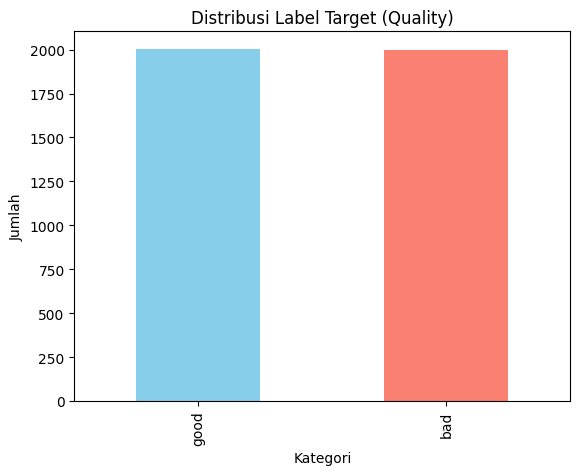

In [13]:
df['Quality'].value_counts().plot(kind='bar', color=['skyblue', 'salmon']) # Menampilkan distribusi kategori pada kolom target
plt.title('Distribusi Label Target (Quality)')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

### 6. Konversi Data dan Analisis Korelasi  
- Beberapa kolom dikonversi menjadi format numerik agar dapat disertakan dalam analisis korelasi.  
- Setelah itu, dilakukan visualisasi *heatmap* untuk melihat hubungan antarfitur dan tingkat korelasinya terhadap label **Quality**.


In [14]:
# Mengonversi kolom Quality menjadi format numerik (good → 1, bad → 0)
df['Quality_num'] = df['Quality'].map({'good': 1, 'bad': 0})

# Mengubah kolom Acidity menjadi tipe data numerik
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

# Memverifikasi hasil konversi data
print(df['Quality'].unique())
print(df['Quality_num'].value_counts())

['good' 'bad' nan]
Quality_num
1.0    2004
0.0    1996
Name: count, dtype: int64


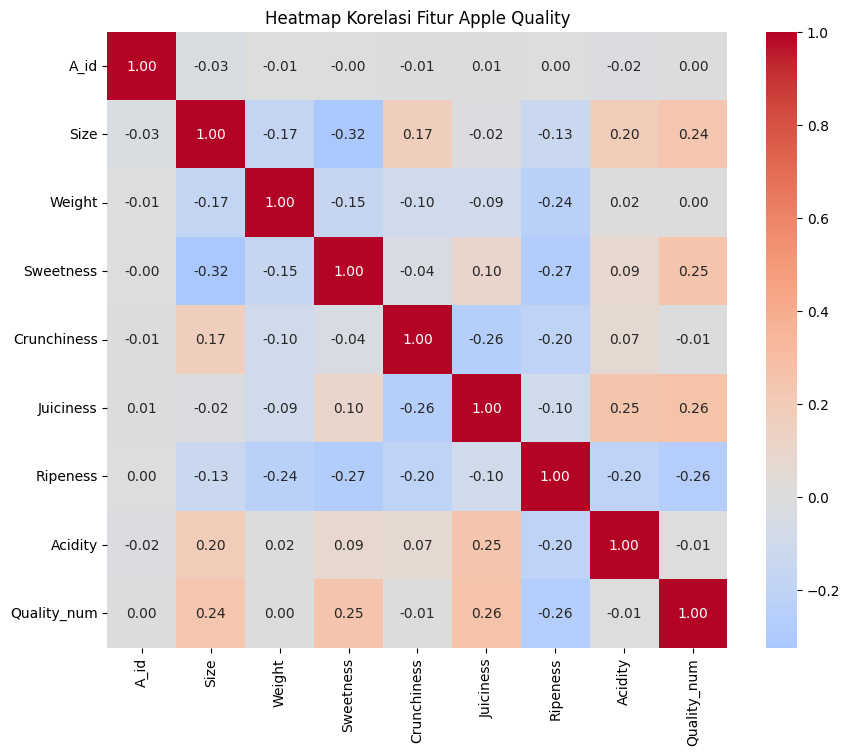

In [15]:
# Menghitung matriks korelasi antar fitur numerik
corr = df.corr(numeric_only=True)

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Fitur Apple Quality")
plt.show()

Berdasarkan hasil *heatmap* korelasi, fitur **Size (r = 0.24)**, **Sweetness (r = 0.25)**, dan **Juiciness (r = 0.26)** memiliki hubungan positif yang paling kuat terhadap kualitas apel, menunjukkan bahwa apel dengan ukuran lebih besar, rasa lebih manis, dan tingkat kejuicyaan tinggi cenderung diklasifikasikan sebagai *good quality*. Sebaliknya, **Ripeness (r = -0.26)** menunjukkan korelasi negatif, menandakan tingkat kematangan berlebih dapat menurunkan mutu buah. Fitur lain seperti **Weight**, **Crunchiness**, dan **Acidity** memiliki korelasi sangat rendah terhadap target, sehingga dianggap tidak berkontribusi signifikan terhadap model. Dengan demikian, fitur yang paling relevan untuk pemodelan selanjutnya adalah **Size**, **Sweetness**, **Juiciness**, dan **Ripeness**.


In [16]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Quality_num
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,1.0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,1.0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,0.0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,1.0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,1.0
...,...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good,1.0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad,0.0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good,1.0
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,good,1.0


## **E. Data Preparation**
Tahap ini bertujuan untuk menyiapkan dataset agar siap digunakan dalam proses pemodelan machine learning. Proses ini meliputi pembersihan data, pemilihan fitur yang relevan, serta pembagian data menjadi data latih dan data uji. Langkah-langkah pada tahap ini dilakukan untuk memastikan bahwa data yang digunakan bersih, terstruktur, dan representatif terhadap permasalahan yang akan diselesaikan.


### 1. Pembersihan Data  
Tahap ini dilakukan untuk memastikan dataset bersih dan layak digunakan dalam proses pemodelan.
Langkah-langkah yang dilakukan meliputi:

- Menghapus kolom yang tidak relevan atau memiliki korelasi rendah terhadap variabel target yaitu A_id, Weight, Crunchiness, dan Acidity.

- Menghapus kolom Quality karena telah dikonversi ke dalam bentuk numerik (Quality_num).

- Menghapus baris terakhir yang berisi informasi non-data seperti teks “created by”.

- Menghapus baris yang mengandung nilai kosong (NaN) untuk menjaga konsistensi dan integritas data.


In [17]:
# Menghapus kolom yang tidak relevan atau memiliki korelasi rendah
df.drop([
    'Quality',       # Sudah dikonversi ke format numerik (Quality_num)
    'A_id',          # Kolom identitas, tidak berpengaruh terhadap prediksi
    'Weight',        # Fitur dengan korelasi rendah terhadap target
    'Crunchiness',   # Fitur dengan korelasi rendah terhadap target
    'Acidity'        # Fitur dengan korelasi rendah terhadap target
], axis=1, inplace=True)

# Menghapus baris terakhir pada dataset
df = df.drop(df.index[-1])

# Menghapus baris yang mengandung nilai kosong (NaN)
df = df.dropna()

### 2. Pemisahan Fitur dan Data Uji  
Memisahkan variabel fitur (X) dan target (y), kemudian membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian guna menjaga proporsi kelas dan validitas evaluasi model.


In [18]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Quality', 'Quality_num'], errors='ignore')
y = df['Quality_num']

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Menjaga proporsi kelas tetap seimbang
)

# Menampilkan ukuran data latih dan uji
print("Train shape:", X_train.shape, y_train.shape)
print("Test  shape:", X_test.shape, y_test.shape)

Train shape: (3200, 4) (3200,)
Test  shape: (800, 4) (800,)


###3. Hasil Preparation

Dataset kini berisi 4.000 baris dan 5 kolom, yang terdiri dari empat fitur utama (Size, Sweetness, Juiciness, Ripeness) serta satu label target (Quality_num).
Seluruh kolom kini bertipe numerik dan siap digunakan dalam proses pelatihan model machine learning.

##**F. Modelling**

In [19]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [20]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [21]:
# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

##**G. Evaluation**
Evaluasi dilakukan untuk mengukur performa model dalam memprediksi kualitas apel berdasarkan data uji. Metrik yang digunakan meliputi akurasi, classification report, dan confusion matrix untuk menilai sejauh mana model mampu membedakan kelas good dan bad secara tepat.
- Akurasi mengukur proporsi prediksi yang benar terhadap seluruh data uji sebagai indikator performa umum.
- Classification report memberikan rincian nilai precision, recall, dan F1-score, yang masing-masing merepresentasikan ketepatan prediksi, kemampuan mengenali kelas sebenarnya, serta keseimbangan antara keduanya.
- Sementara itu, confusion matrix menggambarkan distribusi prediksi benar dan salah pada setiap kelas, sehingga memudahkan analisis terhadap pola kesalahan model.

Secara keseluruhan, kombinasi ketiga metrik tersebut memberikan gambaran komprehensif mengenai efektivitas model dalam melakukan klasifikasi kualitas apel secara akurat dan konsisten.

In [22]:
# Fungsi evaluasi model
def evaluate_model(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print(f"Akurasi: {accuracy_score(y_true, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


=== Logistic Regression ===
Akurasi: 0.7100
Classification Report:
              precision    recall  f1-score   support

         0.0     0.7203    0.6842    0.7018       399
         1.0     0.7007    0.7357    0.7178       401

    accuracy                         0.7100       800
   macro avg     0.7105    0.7099    0.7098       800
weighted avg     0.7105    0.7100    0.7098       800



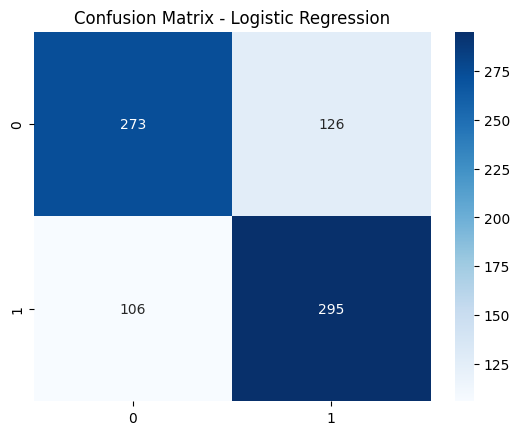

In [23]:
evaluate_model("Logistic Regression", y_test, y_pred_logreg)


=== Random Forest ===
Akurasi: 0.7837
Classification Report:
              precision    recall  f1-score   support

         0.0     0.7943    0.7644    0.7791       399
         1.0     0.7740    0.8030    0.7882       401

    accuracy                         0.7837       800
   macro avg     0.7842    0.7837    0.7837       800
weighted avg     0.7841    0.7837    0.7837       800



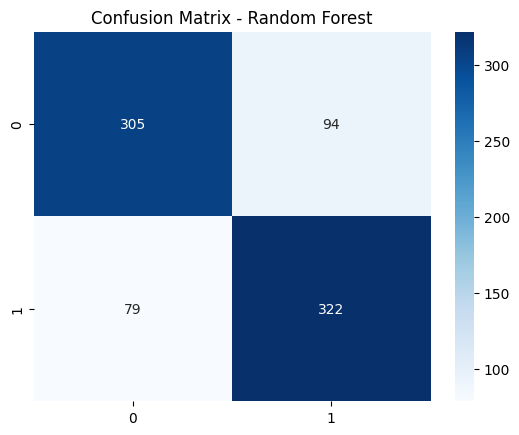

In [24]:
evaluate_model("Random Forest", y_test, y_pred_rf)


=== XGBoost ===
Akurasi: 0.7762
Classification Report:
              precision    recall  f1-score   support

         0.0     0.7880    0.7544    0.7708       399
         1.0     0.7656    0.7980    0.7814       401

    accuracy                         0.7762       800
   macro avg     0.7768    0.7762    0.7761       800
weighted avg     0.7767    0.7762    0.7761       800



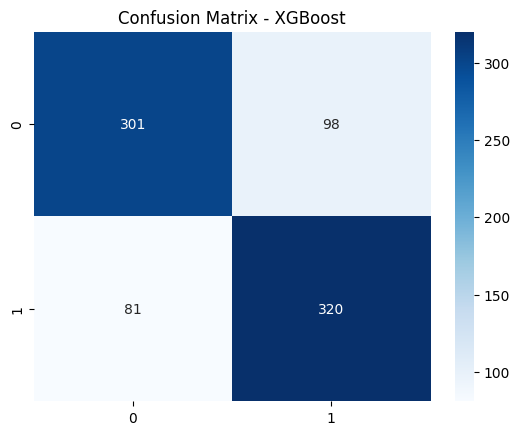

In [25]:
evaluate_model("XGBoost", y_test, y_pred_xgb)

##**H. Kesimpulan**

Proyek Apple Quality Classification berhasil mengimplementasikan algoritma machine learning untuk mengklasifikasikan mutu apel berdasarkan karakteristik fisik dan sensorik. Melalui tahapan terstruktur mulai dari pemahaman masalah, eksplorasi data, pembersihan, pemodelan, hingga evaluasi, diperoleh hasil bahwa model XGBoost memberikan performa terbaik dengan akurasi 77,8%, mengungguli Random Forest dan Logistic Regression.

Analisis korelasi menunjukkan bahwa fitur Size, Sweetness, Juiciness, dan Ripeness memiliki pengaruh dominan terhadap kualitas apel, sedangkan Weight, Crunchiness, dan Acidity berkontribusi rendah. Temuan ini memperkuat bahwa atribut fisik dan rasa merupakan faktor utama dalam menentukan mutu buah.

Secara keseluruhan, penerapan machine learning terbukti mampu meningkatkan efisiensi dan objektivitas proses penilaian mutu hasil pertanian. Ke depan, model dapat dioptimalkan melalui hyperparameter tuning untuk meningkatkan akurasi dan generalisasi, serta dikembangkan dengan menambahkan fitur berbasis citra atau sensor non-destruktif agar sistem klasifikasi lebih adaptif terhadap kondisi nyata di industri pertanian modern.